## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2020 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Adaptación desde dataset FIFA 2019 al dataset FIFA 2020
    Grupo 14: Edgardo Garrigo, Iván Gutierrez y Javier Gallo.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Exploración de la Base](#2.-Exploración-de-la-base)
3. [Preparación de los datos](#3.-Preparación-de-los-datos)
4. [Clustering Visual](#3.-Exploratorio-Visual-para-Clustering)

## 1.-Inicialización-del-entorno

Empecemos cargando algunas herramientas para cargar los datos y manipularlos:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

from utils import print_progress_bar

Para visualización usaremos principalmente plotly, también seaborn y matplotlib.

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls  # visualization
import plotly.figure_factory as ff  # visualization
import seaborn as sns

## 2.-Exploración-de-la-base

Descarguemos los datos de https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv:

In [3]:
df=pd.read_csv("players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,...,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,...,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,...,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,...,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
print(df.dtypes)
print(len(df.columns))

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador.

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', etc.), tomando valores enteros entre 0 y 100.

Realicemos el histograma de la variable "Overall" (desempeño global):

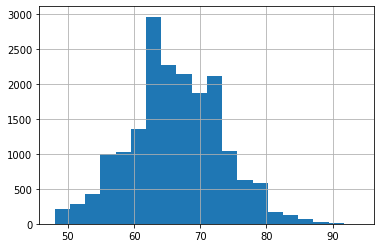

In [6]:
df.overall.hist(bins=20);

Miramos ahora los mejores jugadores por posición, usando las variables 'overall' y 'player_positions':

In [7]:
positions_df = df.player_positions.str.split(',', expand=True)
players_pos_index_df = pd.melt(
    df.join(positions_df),
    id_vars=df.columns,
    value_vars=positions_df.columns,
    var_name='position_index',
    value_name='position'
)
best_players_idx_per_pos = df.groupby(players_pos_index_df.position).overall.idxmax()
best_players_per_pos = players_pos_index_df.iloc[best_players_idx_per_pos]
best_players_per_pos[['position', 'short_name', 'overall']]

,position,short_name,overall
5,CAM,K. De Bruyne,91
7,CB,V. van Dijk,90
15,CDM,N. Kanté,89
22,CF,A. Griezmann,89
8,CM,L. Modrić,90
3,GK,J. Oblak,91
51,LB,Jordi Alba,87
119,LM,K. Coman,84
2,LW,Neymar Jr,92
275,LWB,N. Schulz,82


Veamos ahora cantidad de jugadores por posición:

In [8]:
pd.DataFrame(players_pos_index_df.position.value_counts().sort_index())

,position
CAM,1044
CB,574
CDM,1304
CF,267
CM,1636
LB,709
LM,1360
LW,603
LWB,225
RB,691


Calculemos un ranking de equipos:

In [9]:
# Si usamos la mediana en vez de la media obtenemos un ranking que
# parece más razonable (al menos es lo que me parece a mi, jeje).
# Con la media, Uruguay y México entran en el top 10...
club_avg_overall = df.groupby('club').overall.median().reset_index().sort_values('overall', ascending=False)
club_avg_overall.head(10)

,club,overall
226,FC Bayern München,84.0
350,Juventus,83.0
400,Manchester City,82.0
505,Real Madrid,82.0
224,FC Barcelona,82.0
389,Liverpool,80.0
63,Atlético Madrid,80.0
462,Paris Saint-Germain,79.0
92,Borussia Dortmund,79.0
401,Manchester United,79.0


## 2.-Preparación-de-los-datos

Retiremos jugadores con bajo desempeño global ("Overall"), reduzcamos el tamaño del conjunto de datos y consideremos variables de desempeño por habilidad (skills_ratings):

In [10]:
n = 1000  # cantidad de jugadores a considerar

df_n = df.loc[:n]  # se reduce la base a los n primeros jugadores

df_n = df_n[(df_n.overall > 70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'passing', 'attacking_short_passing', 'attacking_volleys', 'dribbling',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                  'attacking_long_passing', 'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                  'mentality_penalties',  'mentality_composure', 'defending_marking',
                  'defending_standing_tackle', 'defending_sliding_tackle',
                  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes',]
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

41 variables numéricas de desempeño según habilidad


Creemos "el jugador perfecto" para ver a donde se ubica en nuestra visualización:

In [11]:
machine_gun_dict = {'short_name': 'MachineGun', 'overall': 99}
for skill in skills_ratings:
    machine_gun_dict[skill] = 99
    
df_n = df_n.append(machine_gun_dict, ignore_index=True)

In [12]:
df_skills = df_n[skills_ratings]  # base, sólo con desempeños según habilidad (numéricas)

In [13]:
df_skills.head(4)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,passing,attacking_short_passing,attacking_volleys,dribbling,skill_dribbling,skill_curve,skill_fk_accuracy,attacking_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,88,95,70,92.0,92,88,96.0,97,93,94,NaN,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,NaN,NaN,NaN,NaN,NaN,6,11,15,14,8
1,84,94,89,82.0,83,87,89.0,89,81,76,NaN,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,NaN,NaN,NaN,NaN,NaN,7,11,15,14,11
2,87,87,62,87.0,87,87,95.0,96,88,87,NaN,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,NaN,NaN,NaN,NaN,NaN,9,9,15,15,11
3,13,11,15,NaN,43,13,NaN,12,13,14,NaN,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87.0,92.0,78.0,90.0,89.0,87,92,78,90,89


## 3.-Exploratorio-Visual-para-Clustering

Visualicemos todos los pares de variables de skill:

In [14]:
bool_crack = df_n.overall > 85  # diferenciamos a los mejores jugadores

total_iterations = len(skills_ratings) * (len(skills_ratings) - 1) / 2
iteration = 0

for i in range(len(skills_ratings)):
    for j in range(i + 1, len(skills_ratings)):
        skill_1 = skills_ratings[i]
        skill_2 = skills_ratings[j]

        scatter = go.Scatter(
            x=df_skills[skill_1],
            y=df_skills[skill_2],
            mode='markers',
            text=df_n.loc[:, 'club'],  # 'height', 'weight', 'club', 'age', 'short_name', 'position'
            marker=dict(size=5)
        )

        crack_scatter = go.Scatter(
            x=df_skills.loc[bool_crack, skill_1],
            y=df_skills.loc[bool_crack, skill_2],
            name='Top players',
            text=df_n.loc[bool_crack, 'short_name'],
            textfont=dict(family='sans serif', size=10, color='black'),
            opacity=0.9,
            mode='text'
        )

        data = [scatter, crack_scatter]

        layout = go.Layout(
            title='Visualizaci\xc3\xb3n de la base de a dos variables num\xc3\xa9ricas'
                ,
            titlefont=dict(size=20),
            xaxis=dict(title=skill_1),
            yaxis=dict(title=skill_2),
            autosize=False,
            width=1000,
            height=1000
        )

        fig = go.Figure(data=data, layout=layout)

        # iplot(fig)

        fig.write_image('imagenes/grafico_1/{}_vs_{}.png'.format(skill_1, skill_2))
        
        print_progress_bar(iteration, total_iterations)
        iteration += 1

print('\nListo!')

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.9% 
Listo!


Grafiquemos todos los pares de variables de skill, diferenciando los mejores jugadores del resto. Con la siguiente línea de comando podemos ubicar a un jugador (por ejemplo, Leo Messi):

In [15]:
# Gráfico 2

# Elegimos un jugador

selected_player = df_n['short_name'] == 'L. Messi'

# selected_player = df_n["short_name"] == df_n["Name"][4000] # acá podemos elegir otro

bool_crack = df_n['overall'] > 85
bool_elecc = df_n['club'] == 'FC Barcelona'

# bool_elecc = df_n["Position"] == 'GK'
# arqueros

bool_no_crack = df_n['overall'] < 86
bool_machinegun = df_n['short_name'] == 'MachineGun'

palette = ['navy', 'red', '#A2D5F2', 'orange', 'green', 'pink']

total_iterations = len(skills_ratings) * (len(skills_ratings) - 1) / 2
iteration = 0

for i in range(len(skills_ratings)):
    for j in range(i + 1, len(skills_ratings)):
        skill_1 = skills_ratings[i]
        skill_2 = skills_ratings[j]

        data = []

        crack_scatter = go.Scatter(
            x=df_skills.loc[bool_crack, skill_1],
            y=df_skills.loc[bool_crack, skill_2],
            name='Crack',
            text=df_n.loc[bool_crack, 'short_name'],
            textfont=dict(family='sans serif', size=15, color='black'),
            opacity=0.9,
            marker=dict(color=palette[2], size=7),
            mode='markers+text',
        )

        no_crack_scatter = go.Scatter(
            x=df_skills.loc[bool_no_crack, skill_1],
            y=df_skills.loc[bool_no_crack, skill_2],
            name='Average player',
            text=df_n.loc[bool_no_crack, 'short_name'],
            opacity=0.6,
            marker=dict(color=palette[1], size=3),
            mode='markers',
        )
        elecc_scatter = go.Scatter(
            x=df_skills.loc[bool_elecc, skill_1],
            y=df_skills.loc[bool_elecc, skill_2],
            name='Elecci\xc3\xb3n',
            text=df_n.loc[bool_elecc, 'short_name'],
            opacity=0.6,
            marker=dict(color=palette[0], size=5),
            mode='markers',
        )

        machinegun_scatter = go.Scatter(
            x=df_skills.loc[bool_machinegun, skill_1],
            y=df_skills.loc[bool_machinegun, skill_2],
            name='Perfect player',
            textfont=dict(family='sans serif', size=20, color='black'),
            opacity=0.6,
            marker=dict(color=palette[3], size=30),
            mode='markers+text',
        )

        selected_player_scatter = go.Scatter(
            x=df_skills.loc[selected_player, skill_1],
            y=df_skills.loc[selected_player, skill_2],
            name='Selected player',
            text=df_n.loc[selected_player, 'short_name'],
            textfont=dict(family='sans serif', size=20, color='black'),
            opacity=1,
            marker=dict(color=palette[4], size=40),
            mode='markers+text',
        )

        data = [no_crack_scatter,
                elecc_scatter,
                crack_scatter,
                machinegun_scatter,
                selected_player_scatter]

        layout = go.Layout(
            title='Fifa Players',
            titlefont=dict(size=20),
            xaxis=dict(title=skill_1),
            yaxis=dict(title=skill_2),
            autosize=False,
            width=1000,
            height=1000,
        )

        fig = go.Figure(data=data, layout=layout)

        # iplot(fig)

        fig.write_image('imagenes/grafico_2/{}_vs_{}.png'.format(skill_1, skill_2))
        
        print_progress_bar(iteration, total_iterations)
        iteration += 1

print('\nListo!')

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.9% 
Listo!


Identifiquemos algunos jugadores por nombre:

In [17]:
df_n.loc[0:43, 'short_name']

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3              J. Oblak
4             E. Hazard
5          K. De Bruyne
6         M. ter Stegen
7           V. van Dijk
8             L. Modrić
9              M. Salah
10            K. Mbappé
11         K. Koulibaly
12              H. Kane
13              Alisson
14               De Gea
15             N. Kanté
16         G. Chiellini
17            S. Agüero
18         Sergio Ramos
19            L. Suárez
20       R. Lewandowski
21      Sergio Busquets
22         A. Griezmann
23            P. Dybala
24             P. Pogba
25              Ederson
26          R. Sterling
27           C. Eriksen
28          T. Courtois
29                Piqué
30        S. Handanovič
31             M. Neuer
32            H. Lloris
33          David Silva
34            E. Cavani
35             D. Godín
36             T. Kroos
37              M. Reus
38        P. Aubameyang
39              S. Mané
40           A. Laporte
41       Bernard